# Basic Quantum Chemistry Workflow

This notebook demonstrates a basic workflow combining RDKit for molecular structure handling and Psi4 for quantum chemistry calculations.

## Setup

In [1]:
import sys
sys.path.insert(0, '../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from molecular_helpers import smiles_to_mol, add_hydrogens, generate_3d_coordinates, mol_to_xyz
from quantum_helpers import run_energy_calculation, optimize_geometry
from visualization_helpers import plot_molecule_2d, plot_energy_comparison

# Suppress RDKit warnings
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

## Example 1: Water Molecule

Let's start with a simple water molecule.

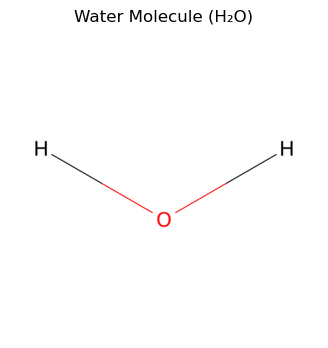

Molecular formula: H₂O
Number of atoms: 3


In [2]:
# Create water molecule from SMILES
smiles = "O"
mol = smiles_to_mol(smiles)
mol = add_hydrogens(mol)

# Display 2D structure
plot_molecule_2d(mol, figsize=(4, 4))
plt.title("Water Molecule (H₂O)")
plt.show()

print(f"Molecular formula: H₂O")
print(f"Number of atoms: {mol.GetNumAtoms()}")

## Example 2: Generate 3D Coordinates and Run Energy Calculation

In [3]:
# Generate 3D coordinates
mol_3d = generate_3d_coordinates(mol)

# Convert to XYZ format
xyz_string = mol_to_xyz(mol_3d)
print("XYZ Coordinates:")
print(xyz_string)
print()

XYZ Coordinates:
3

O      0.007544     0.397743     0.000000
H     -0.767103    -0.184393     0.000000
H      0.759559    -0.213350     0.000000



In [4]:
# Run single point energy calculation
energy = run_energy_calculation(xyz_string, method="scf", basis="sto-3g")
print(f"Single Point Energy: {energy:.6f} Hartrees")


  Memory set to 476.837 MiB by Python driver.

Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  6, 6, 3
    Auxiliary basis highest AM E, G, H:  7, 7, 4
    Onebody   basis highest AM E, G, H:  -, -, -
    Solid Harmonics ordering:            Gaussian

*** tstart() called on fedora
*** at Sat Jan 17 08:11:40 2026

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line    81 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/sto-3g.gbs 
    atoms 2-3 entry H          line    19 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ------------

## Example 3: Comparing Multiple Molecules

Let's compare energies of several simple molecules.

In [5]:
# Define molecules
molecules = {
    "Water": "O",
    "Methane": "C",
    "Ammonia": "N"
}

results = []

for name, smiles in molecules.items():
    print(f"Processing {name}...")
    
    # Generate 3D structure
    mol = smiles_to_mol(smiles)
    mol = add_hydrogens(mol)
    mol = generate_3d_coordinates(mol)
    
    # Calculate energy
    xyz = mol_to_xyz(mol)
    energy = run_energy_calculation(xyz, method="scf", basis="sto-3g")
    
    results.append({
        'Molecule': name,
        'SMILES': smiles,
        'Energy (Hartrees)': energy
    })

# Create DataFrame
df = pd.DataFrame(results)
print("\nResults:")
print(df)

Processing Water...

  Memory set to 476.837 MiB by Python driver.

Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  6, 6, 3
    Auxiliary basis highest AM E, G, H:  7, 7, 4
    Onebody   basis highest AM E, G, H:  -, -, -
    Solid Harmonics ordering:            Gaussian

*** tstart() called on fedora
*** at Sat Jan 17 08:11:50 2026

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line    81 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/sto-3g.gbs 
    atoms 2-3 entry H          line    19 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
 

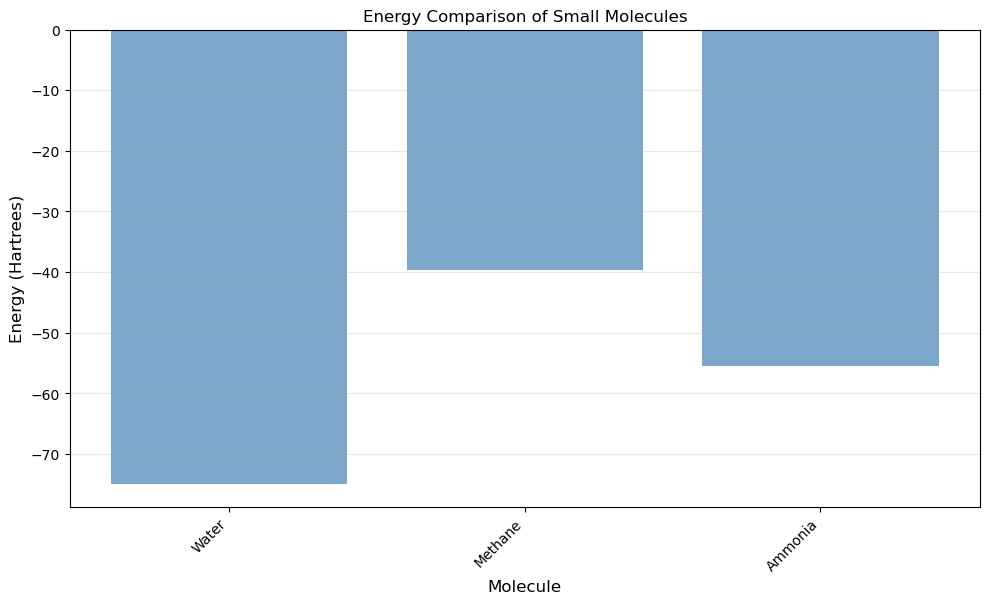

In [6]:
# Visualize results
plot_energy_comparison(df['Molecule'].tolist(), df['Energy (Hartrees)'].tolist())
plt.title("Energy Comparison of Small Molecules")
plt.show()

## Example 4: Geometry Optimization

Optimize the geometry of a molecule to find its minimum energy structure.

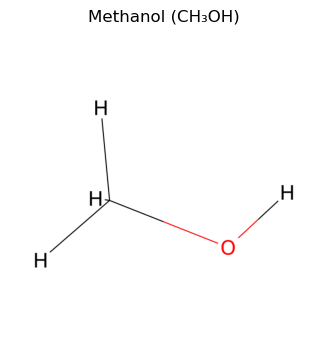


  Memory set to 476.837 MiB by Python driver.

Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  6, 6, 3
    Auxiliary basis highest AM E, G, H:  7, 7, 4
    Onebody   basis highest AM E, G, H:  -, -, -
    Solid Harmonics ordering:            Gaussian

*** tstart() called on fedora
*** at Sat Jan 17 08:12:05 2026

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry C          line    61 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/sto-3g.gbs 
    atoms 2   entry O          line    81 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/sto-3g.gbs 
    atoms 3-6 entry H          line    19 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith


Some dependencies such as QCElemental have not yet finished migration to pydantic v2. If issues are encountered please downgrade pydantic or upgrade QCElemental as appropriate


  ==> Integral Setup <==

  DFHelper Memory: AOs need 0.001 GiB; user supplied 0.349 GiB. 
  SCF_SUBTYPE=INCORE selected. In-core MEM_DF algorithm will be used.
  Using in-core AOs.

  ==> MemDFJK: Density-Fitted J/K Matrices <==

    J tasked:                   Yes
    K tasked:                   Yes
    wK tasked:                   No
    OpenMP threads:               1
    Memory [MiB]:               357
    Algorithm:                 Core
    Schwarz Cutoff:           1E-12
    Mask sparsity (%):       0.0000
    Fitting Condition:        1E-10

   => Auxiliary Basis Set <=

  Basis Set: (STO-3G AUX)
    Blend: DEF2-UNIVERSAL-JKFIT
    Number of shells: 74
    Number of basis functions: 224
    Number of Cartesian functions: 262
    Spherical Harmonics?: true
    Max angular momentum: 4

  Minimum eigenvalue in the overlap matrix is 2.3148427845E-01.
  Reciprocal condition number of the overlap matrix is 1.0245493214E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.69e-03



  ==> MemDFJK: Density-Fitted J/K Matrices <==

    J tasked:                   Yes
    K tasked:                   Yes
    wK tasked:                   No
    OpenMP threads:               1
    Memory [MiB]:               357
    Algorithm:                 Core
    Schwarz Cutoff:           1E-12
    Mask sparsity (%):       0.0000
    Fitting Condition:        1E-10

   => Auxiliary Basis Set <=

  Basis Set: (STO-3G AUX)
    Blend: DEF2-UNIVERSAL-JKFIT
    Number of shells: 74
    Number of basis functions: 224
    Number of Cartesian functions: 262
    Spherical Harmonics?: true
    Max angular momentum: 4

  Minimum eigenvalue in the overlap matrix is 2.3148427845E-01.
  Reciprocal condition number of the overlap matrix is 1.0245493214E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   --------------

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 8.32e-06



   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry C          line    61 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/sto-3g.gbs 
    atoms 2   entry O          line    81 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/sto-3g.gbs 
    atoms 3-6 entry H          line    19 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/sto-3g.gbs 

  Reading orbitals from file /tmp/stdout.default.33493.180.npy, no projection.

  ==> Integral Setup <==

  DFHelper Memory: AOs need 0.001 GiB; user supplied 0.349 GiB. 
  SCF_SUBTYPE=INCORE selected. In-core MEM_DF algorithm will be used.
  Using in-core AOs.

  ==> MemDFJK: Density-Fitted J/K Matrices <==

    J tasked:                   Yes
    K tasked:                   Yes
    wK tasked:                   No
    OpenMP threads:               1
    Memory [MiB]:               357
    Algorithm:                 Core
    Schwarz Cutoff:           1E-12
    Ma

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.70e-07



   => Loading Basis Set <=

    Name: (STO-3G AUX)
    Role: JKFIT
    Keyword: DF_BASIS_SCF
    atoms 1   entry C          line   198 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/def2-universal-jkfit.gbs 
    atoms 2   entry O          line   318 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/def2-universal-jkfit.gbs 
    atoms 3-6 entry H          line    18 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/def2-universal-jkfit.gbs 

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry C          line    61 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/sto-3g.gbs 
    atoms 2   entry O          line    81 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/sto-3g.gbs 
    atoms 3-6 entry H          line    19 file /home/juan/.local/share/mamba/envs/psi4/share/psi4/basis/sto-3g.gbs 

  Reading orbitals from file /tmp/stdout.default.33493.180.npy, no projection.

  ==>

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.77e-07



Optimizer: Optimization complete!

	        --- Internal Coordinate Step in ANG or DEG, aJ/ANG or AJ/DEG ---
	-------------------------------------------------------------------------------
	           Coordinate      Previous         Force          Change          New 
	           ----------      --------        ------          ------        ------
	               R(1,2)       1.43309       -0.00093       -0.00009       1.43300
	               R(1,3)       1.09509       -0.00025       -0.00004       1.09505
	               R(1,4)       1.09509       -0.00025       -0.00004       1.09505
	               R(1,5)       1.09139        0.00063        0.00010       1.09149
	               R(2,6)       0.99089        0.00241        0.00025       0.99114
	             B(1,2,6)     103.87596       -0.00001       -0.02381     103.85215
	             B(2,1,3)     112.37965       -0.00000       -0.01034     112.36931
	             B(2,1,4)     112.37966       -0.00000       -0.01036     112.36930


In [7]:
# Create methanol molecule
mol = smiles_to_mol("CO")
mol = add_hydrogens(mol)
mol = generate_3d_coordinates(mol)

# Display structure
plot_molecule_2d(mol, figsize=(4, 4))
plt.title("Methanol (CH₃OH)")
plt.show()

# Get initial geometry
xyz_initial = mol_to_xyz(mol)

# Calculate initial energy
initial_energy = run_energy_calculation(xyz_initial, method="scf", basis="sto-3g")
print(f"Initial Energy: {initial_energy:.6f} Hartrees")

# Optimize geometry
print("\nOptimizing geometry...")
optimized_energy, optimized_xyz = optimize_geometry(xyz_initial, method="scf", basis="sto-3g")
print(f"Optimized Energy: {optimized_energy:.6f} Hartrees")
print(f"Energy Change: {optimized_energy - initial_energy:.6f} Hartrees")

## Summary

This notebook demonstrated:
1. Creating molecular structures from SMILES strings using RDKit
2. Generating 3D coordinates
3. Running quantum chemistry calculations with Psi4
4. Comparing energies across multiple molecules
5. Optimizing molecular geometries

All calculations used the helper functions from the `src/` module, making the notebook code clean and reusable.